In [49]:
from os import listdir
from os.path import isfile, join

mypath = "D:/Brain Tumor/dataset"
file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(len(file_names))
# img = imread('D:/Brain Tumor/dataset/N (1).jpeg')
# resized_img = resize(img, (128,128))
# fd, hog_image = hog(img_arr, orientations=9, pixels_per_cell=(8, 8),
# cells_per_block=(2, 2), visualize=True, multichannel=True)
# print(fd.shape)

253


In [129]:
#reading the image
#img = imread('D:/Brain Tumor/yes/Y2.jpg')
#resize image
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import numpy as np
feature_vector = []
labels = []
min_shape = []
for i,file in enumerate(file_names):
        img = imread(mypath+"/"+file,0)
        resized_img = resize(img, (128,128))
        img_arr = np.array(resized_img)
        #generating HOG features
        fd, hog_image = hog(img_arr, orientations=9, pixels_per_cell=(8, 8),
        cells_per_block=(2, 2), visualize=True, multichannel=None)
        if file[0] == 'Y':
            labels.append(1)
        else:
            labels.append(0)
        feature_vector.append(fd)
        min_shape.append(fd.shape)
print(len(feature_vector))
print(min(min_shape))

253
(8100,)


In [130]:
feature_vector = np.array(feature_vector)
feature_vector.shape
labels = np.array(labels)
labels.shape

(253,)

In [131]:
import pandas as pd

#panda dataframe 
df=pd.DataFrame(data=feature_vector)
df['label']=labels
df=df.sample(frac=1)
X=df.drop(['label'], axis = 1)
y=df['label']

X

,0,1,2,3,4,5,6,7,8,9,...,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099
160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.396900,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
242,0.419150,0.002224,0.127486,0.000410,0.419150,0.000330,0.001303,0.000000,0.324000,0.003569,...,0.003424,0.416142,0.000804,0.113936,0.001361,0.416142,0.0,0.000924,0.000642,0.347155
108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
91,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.587688,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.403600,0.014061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254817,...,0.006424,0.392763,0.099362,0.065091,0.000000,0.019640,0.0,0.000000,0.000000,0.095444
106,0.243516,0.000000,0.000000,0.000000,0.325075,0.062675,0.000000,0.086979,0.000000,0.309524,...,0.090851,0.126191,0.000000,0.049812,0.075164,0.273758,0.0,0.000000,0.000000,0.000000
47,0.380548,0.361537,0.000000,0.380548,0.380548,0.019765,0.380548,0.380548,0.380548,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
36,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [132]:
from sklearn import svm 
from sklearn.metrics import confusion_matrix  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Different model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [133]:
svm_linear=svm.SVC(kernel='linear',gamma=0.001,C=10)

In [134]:
svm_linear.fit(X_train,y_train)
yhat = svm_linear.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('\tAccuracy: %.3f' % acc)
print(confusion_matrix(y_test, yhat))
print("\n\n")

	Accuracy: 0.828
[[22  2]
 [ 9 31]]





In [135]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(solver='liblinear')

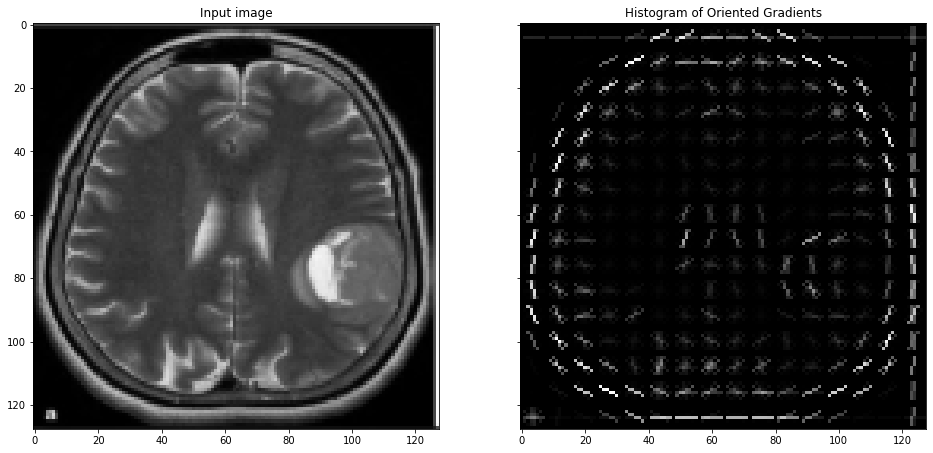

In [136]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [141]:
from sklearn import preprocessing
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import confusion_matrix  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


rf_class = RandomForestClassifier(n_estimators=100)
svm_rbf=svm.SVC(kernel='rbf',gamma=0.001,C=10)
svm_linear=svm.SVC(kernel='linear',gamma=0.0001,C=100)
knn= KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2) 
log = LogisticRegression(solver='liblinear')

model_names={"Random Forest":rf_class,"SVM RBF":svm_rbf,"SVM_linear":svm_linear,"k nearest neighbor":knn,"logistic regression":log}

In [142]:
def testing(model_name,X_train, X_test, y_train, y_test):
    model=model_names[model_name]
    model.fit(X_train,y_train)
    yhat = model.predict(X_test)
    # evaluate predictions
    acc = accuracy_score(y_test, yhat)
    print(model_name,'\tAccuracy: %.3f' % acc)
    print(confusion_matrix(y_test, yhat))
    print("\n\n")

In [143]:
def result(dataset):
    
    
    #panda dataframe 
    df=pd.DataFrame(data=dataset)
    df['label']=labels
    df=df.sample(frac=1)
    X=df.drop(['label'], axis = 1)
    y=df['label']
    
    
    #Different model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    for model in ["Random Forest","SVM RBF","SVM_linear","k nearest neighbor","logistic regression"]:
        testing(model,X_train, X_test, y_train, y_test)

In [144]:
result(feature_vector)

Random Forest 	Accuracy: 0.875
[[11  6]
 [ 2 45]]



SVM RBF 	Accuracy: 0.859
[[12  5]
 [ 4 43]]



SVM_linear 	Accuracy: 0.859
[[12  5]
 [ 4 43]]



k nearest neighbor 	Accuracy: 0.859
[[16  1]
 [ 8 39]]



logistic regression 	Accuracy: 0.859
[[12  5]
 [ 4 43]]



